## In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow
More specifically, we're going to cover:
- Introduction to tensors
- Getting informations from tensors
- Manupulating tensors
- Tensors & NumPy
- Using@tf.function (a way to speed up your regular Python functions)
- Using GPUs with TensorFlow (or TPUs)
- Excercise to try for yourself

# Introduction to Tensors

In [2]:
# İmport TensorFlow
import tensorflow as tf
print(tf.__version__)

2.20.0


In [3]:
# Create testros with  tf.constant()
scalar = tf.constant(8)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [4]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)

scalar.ndim #type:ignore

0

In [5]:
# create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
# check the dimension of our vector
vector.ndim #type:ignore

1

In [7]:
# create a matrix (has more than 1 dimensions)
matrix = tf.constant([
    [10,7],
    [7,10]
    ])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim #type:ignore

2

In [9]:
# create another matrix
another_matrix = tf.constant([
    [10., 7.], [3., 2.], [8., 7.]
], dtype=tf.float16) # specify the data type with dtype


In [10]:
# what's the number of dimensions of another_matrix?
another_matrix.ndim #type:ignore

2

In [11]:
# lets create a tensor
tensor = tf.constant([
    [[1,2,3],
    [4,5,6]],

    [[7,8,9],
    [10,11,12]],

    [[13,14,15],
    [16,17,18]]
])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [12]:
tensor.ndim # type: ignore

3

what we've created so far:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* matrix: a 2-dimensional array of numbers
* Tensor an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

# Changeable & Unchangeable tensors

creating Tensors with tf.Variable

In [13]:
tf.Variable
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Let's try change one of the elements in our changeable tensors

changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7) # type: ignore
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7) # type: ignore
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

# Creating random tensors
Random tesors are tensors of some abitrary size which contain random numbers.

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42)# set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))

random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))


#are they equal?
print(random_1)
print(random_2)
print("\n",random_1==random_2)



tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[-0.7565803  -0.06854702]
 [ 0.07595026 -1.2573844 ]
 [-0.23193763 -1.8107855 ]], shape=(3, 2), dtype=float32)

 tf.Tensor(
[[ True  True]
 [ True  True]
 [ True  True]], shape=(3, 2), dtype=bool)


# Shuffle the order of elements in a tensor

In [ ]:
# shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)

not_shuffled = tf.constant([
    [10,7],
    [3,4],
    [2,5]
])

# shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

🛠️ **Exercise:** Read through TensorFlow documantion on random seed generation:   
https://www.tensorflow.org/api_docs/python/tf/random/set_seed and practice writing 5 random tensors and shuffle them

## My answer

In [ ]:
random_1 = tf.random.Generator.from_seed(7).normal(shape=(2,3))
random_2 = tf.random.Generator.from_seed(42).normal(shape=(2,3))

tf.random.set_seed(7)
random_3 = tf.random.Generator.from_seed(7).normal(shape=(2,3))
random_4 = tf.random.Generator.from_seed(42).normal(shape=(2,3))

random_5 = tf.random.Generator.from_non_deterministic_state().normal(shape=(2,3))



shuffled_1 = tf.random.shuffle(random_1)
print(shuffled_1)
print()

shuffled_2 = tf.random.shuffle(random_2, seed=42)
print(shuffled_2)
print()

shuffled_3 = tf.random.shuffle(random_3, seed=7)
print(shuffled_3)
print()


tf.random.set_seed(42)
shuffled_4 = tf.random.shuffle(random_4, seed=42)
print(shuffled_4)
print()

shuffled_5 = tf.random.shuffle(random_5, seed=7)
print(shuffled_5)

tf.Tensor(
[[-1.3240396   0.28785667 -0.8757901 ]
 [-0.08857018  0.69211644  0.84215707]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[-1.2573844  -0.23193763 -1.8107855 ]
 [-0.7565803  -0.06854702  0.07595026]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[-1.3240396   0.28785667 -0.8757901 ]
 [-0.08857018  0.69211644  0.84215707]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[-1.2573844  -0.23193763 -1.8107855 ]
 [-0.7565803  -0.06854702  0.07595026]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[ 1.6770866  -0.65034175  0.6235208 ]
 [ 0.59424156 -0.1711179  -0.6156397 ]], shape=(2, 3), dtype=float32)


## Explanetion

> rule 4: It looks like "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [ ]:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

## Other ways to make tensors

In [ ]:
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# create a tensor of all zeros
tf.zeros([3,4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Turn NumPy array into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing)

In [ ]:
# You can also turn Numpy arrays into tensors
import numpy as np

numpy_A = np.arange(1,25, dtype = np.int32) # create a numpty array between 1 and 25.
numpy_A
# X = tf.constant(some_matrix) # capital for matrix or tensor
# Y = tf.constant(vector) # non-captial for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A)
B = tf.constant(numpy_A, shape=(2,3,4))
C = tf.constant(numpy_A, shape=(3,8))

print((2*3*4), (3*8))

print()
print(A)
print()
print(B)
print()
print(C)


24 24

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], shape=(24,), dtype=int32)

tf.Tensor(
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]], shape=(2, 3, 4), dtype=int32)

tf.Tensor(
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]], shape=(3, 8), dtype=int32)


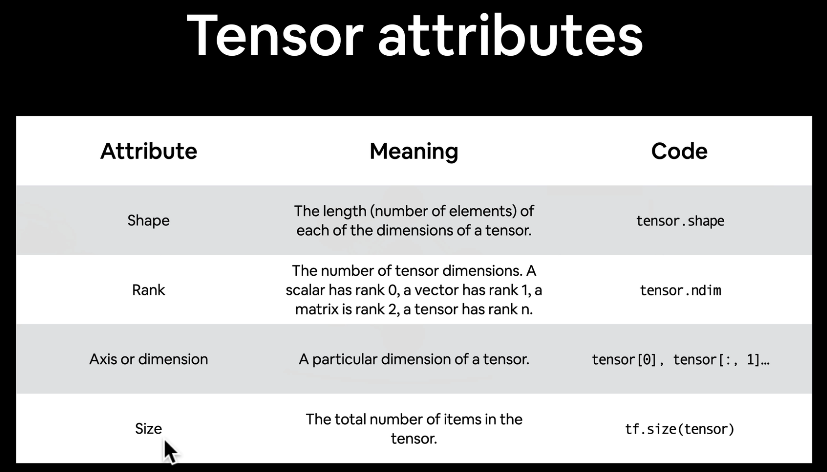

In [ ]:
from IPython.display import Image, display
display(Image(filename="tensor_attributes.png"))


### Getting more information from tensors

when dealing with tensors you probably want to be aware of the following attributes:

* shape
* rank
* Axis or dimension
* size

In [15]:
# Create  a rank 4 tensors (4 dimensions)
rank_4_tensor = tf.zeros(shape=(2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [16]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [17]:
2*3*4*5

120

In [23]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimesions(rank):", rank_4_tensor.ndim)
print("shape of our tensor", rank_4_tensor.shape)
print("Elements along the 0 axis", rank_4_tensor.shape[0])
print("Elements along the last axis", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor", tf.size(rank_4_tensor))
print("Total number of elements in our tensor", tf.size(rank_4_tensor).numpy()) # type: ignore



Datatype of every element: <dtype: 'float32'>
Number of dimesions(rank): 4
shape of our tensor (2, 3, 4, 5)
Elements along the 0 axis 2
Elements along the last axis 5
Total number of elements in our tensor tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor 120
